In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import os
import math
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn import preprocessing
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import random 
random.seed(33)

In [84]:
listings = pd.read_csv('../Data/listings_clean.csv', index_col=0)

In [85]:
numerical_features = ['latitude', 'longitude', 'accommodates', 'bathrooms','bedrooms', 'beds']

In [86]:
boolean_features = ['instant_bookable', 'is_business_travel_ready']

In [87]:
categorical_features = ['neighbourhood_cleansed', 'property_type', 'bed_type']
listings_categorical = pd.get_dummies(listings[categorical_features], columns=categorical_features, 
                            prefix=["Neigh", "Property", "Bed"])

In [88]:
listingsCluster = pd.concat([listings[numerical_features],listings[categorical_features],listings[boolean_features]], axis=1)

In [89]:
listingsCluster.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,neighbourhood_cleansed,property_type,bed_type,instant_bookable,is_business_travel_ready
id,,,,,,,,,,,
18628,40.424715,-3.698638,2,1.0,0.0,1.0,Justicia,Apartment,Pull-out Sofa,1,0
19864,40.413418,-3.706838,2,1.0,0.0,1.0,Embajadores,Apartment,Pull-out Sofa,1,0
21512,40.424920,-3.713446,2,1.0,0.0,1.0,Argüelles,Apartment,Pull-out Sofa,0,0
23021,40.423417,-3.712456,10,3.0,4.0,5.0,Argüelles,Apartment,Real Bed,0,0
24805,40.422022,-3.703954,3,1.0,0.0,2.0,Universidad,Apartment,Real Bed,0,0


In [90]:
listingsCluster.isnull().sum()

latitude                    0
longitude                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
neighbourhood_cleansed      0
property_type               0
bed_type                    0
instant_bookable            0
is_business_travel_ready    0
dtype: int64

In [91]:
to_categorical = categorical_features + boolean_features
indCatColumns = [listingsCluster.columns.get_loc(col) for col in to_categorical]

In [92]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()

In [93]:
listingsCluster[numerical_features] = RS.fit_transform(listingsCluster[numerical_features])

In [94]:
listingsCluster.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,instant_bookable,is_business_travel_ready
count,8.586000e+03,8.586000e+03,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000
mean,1.526813e-01,3.135931e-01,0.066562,0.248777,0.479385,0.201025,0.556138,0.063359
std,1.118500e+00,1.670191e+00,0.966366,0.512864,0.957383,0.766550,0.496867,0.243622
min,-5.753218e+00,-1.201677e+01,-1.500000,-1.000000,-1.000000,-0.500000,0.000000,0.000000
25%,-4.771182e-01,-4.703298e-01,-0.500000,0.000000,0.000000,-0.500000,0.000000,0.000000
50%,2.397762e-13,-1.997035e-14,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.228818e-01,5.296702e-01,0.500000,0.000000,1.000000,0.500000,1.000000,0.000000
max,1.261458e+01,1.425931e+01,6.000000,5.000000,9.000000,7.500000,1.000000,1.000000


In [73]:
#In order to put more weight on these 2 variables
listingsCluster['latitude'] = listingsCluster['latitude'] * 3
listingsCluster['longitude'] = listingsCluster['latitude'] * 3

In [74]:
listingsCluster.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,instant_bookable,is_business_travel_ready
count,8.586000e+03,8.586000e+03,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000
mean,4.580440e-01,1.374132e+00,0.066562,0.248777,0.479385,0.201025,0.556138,0.063359
std,3.355500e+00,1.006650e+01,0.966366,0.512864,0.957383,0.766550,0.496867,0.243622
min,-1.725965e+01,-5.177896e+01,-1.500000,-1.000000,-1.000000,-0.500000,0.000000,0.000000
25%,-1.431354e+00,-4.294063e+00,-0.500000,0.000000,0.000000,-0.500000,0.000000,0.000000
50%,7.193286e-13,2.157986e-12,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.568646e+00,4.705937e+00,0.500000,0.000000,1.000000,0.500000,1.000000,0.000000
max,3.784375e+01,1.135312e+02,6.000000,5.000000,9.000000,7.500000,1.000000,1.000000


In [15]:
! pip install --upgrade kmodes

Requirement already up-to-date: kmodes in /home/dsc/anaconda3/lib/python3.5/site-packages (0.9)
Requirement not upgraded as not directly required: scipy>=0.13.3 in /home/dsc/anaconda3/lib/python3.5/site-packages (from kmodes) (1.0.1)
Requirement not upgraded as not directly required: numpy>=1.10.4 in /home/dsc/anaconda3/lib/python3.5/site-packages (from kmodes) (1.14.3)
Requirement not upgraded as not directly required: scikit-learn<0.20.0,>=0.19.0 in /home/dsc/anaconda3/lib/python3.5/site-packages (from kmodes) (0.19.1)


In [95]:
from kmodes.kprototypes import KPrototypes

In [96]:
for cat_col in categorical_features:
    listingsCluster[cat_col] = preprocessing.LabelEncoder().fit_transform(listingsCluster[cat_col])

In [97]:
X = listingsCluster.values

In [98]:
def distance_dissim(X,Y,gamma,categorical):
    no_categorical = [i for i in range(len(X)) if i not in categorical]
    Xnum = np.asanyarray([X[ii] for ii in no_categorical]).astype(np.float64)
    Ynum = np.asanyarray([Y[ii] for ii in no_categorical]).astype(np.float64)
    Xcat = np.asanyarray([X[ii] for ii in categorical])
    Ycat = np.asanyarray([Y[ii] for ii in categorical])
    
    distance_dissim = distance.euclidean(Xnum, Ynum) + gamma * np.sum(Xcat != Ycat)
    
    return distance_dissim

In [30]:
meandist=[]
clusters = range(1,10)

for k in clusters:
    model = KPrototypes(n_clusters=k, init='Huang', n_init=1, verbose=2)
    model_fit = model.fit(X, categorical = indCatColumns)
    clusassign= model_fit.predict(X, categorical = indCatColumns)
    centroids = list()
    for i in range(k):
        centroids.append(list())
        centroids[i] = np.append(model_fit.cluster_centroids_[0][i], model_fit.cluster_centroids_[1][i])
    meandist.append(sum(np.min(cdist(X,centroids, metric=lambda X,Y: distance_dissim(X,Y,gamma = model_fit.gamma,categorical = indCatColumns)),axis=1))/listingsCluster.shape[0])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 353542.60816641717
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1952, ncost: 224548.72691717598
Run: 1, iteration: 2/100, moves: 1740, ncost: 204668.62606888852
Run: 1, iteration: 3/100, moves: 613, ncost: 201604.8496623783
Run: 1, iteration: 4/100, moves: 619, ncost: 197865.94417373845
Run: 1, iteration: 5/100, moves: 571, ncost: 193591.91802273958
Run: 1, iteration: 6/100, moves: 571, ncost: 187732.60544611077
Run: 1, iteration: 7/100, moves: 322, ncost: 185338.16999237044
Run: 1, iteration: 8/100, moves: 123, ncost: 184872.17772687195
Run: 1, iteration: 9/100, moves: 40, ncost: 184823.45177811285
Run: 1, iteration: 10/100, moves: 17, ncost: 184814.09108913518
Run: 1, iteration: 11/100, moves: 8, ncost: 184811.19167080882
Run: 1, iteration: 12/100, moves: 3, ncost: 184810.69472453563
Run: 1, iter

Run: 1, iteration: 12/100, moves: 9, ncost: 59014.262096463346
Run: 1, iteration: 13/100, moves: 17, ncost: 59012.496988467916
Run: 1, iteration: 14/100, moves: 8, ncost: 59012.122974126745
Run: 1, iteration: 15/100, moves: 9, ncost: 59011.231896157806
Run: 1, iteration: 16/100, moves: 5, ncost: 59010.89820499589
Run: 1, iteration: 17/100, moves: 4, ncost: 59010.81024659325
Run: 1, iteration: 18/100, moves: 1, ncost: 59010.7986268883
Run: 1, iteration: 19/100, moves: 0, ncost: 59010.7986268883
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2312, ncost: 62628.60160020175
Run: 1, iteration: 2/100, moves: 1048, ncost: 59083.83757351287
Run: 1, iteration: 3/100, moves: 956, ncost: 57275.22896783258
Run: 1, iteration: 4/100, moves: 665, ncost: 56311.04515839

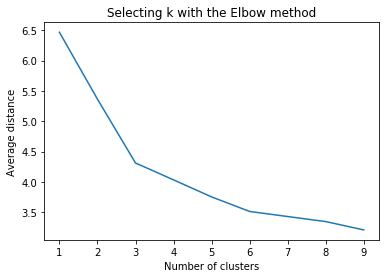

In [31]:
plt.plot(clusters,meandist)
plt.xlabel("Number of clusters")
plt.ylabel("Average distance")
plt.title("Selecting k with the Elbow method")
plt.show()

In [32]:
#According to the Elbow method, we could consider 3 clusters and maybe 6 clusters

In [99]:
model3 = KPrototypes(n_clusters=3, init='Huang', n_init=1, verbose=2)
model_fit3 = model3.fit(X, categorical = indCatColumns)
clusassign3= model_fit3.predict(X, categorical = indCatColumns)
listings['Cluster3'] = model_fit3.labels_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1982, ncost: 39821.58290888937
Run: 1, iteration: 2/100, moves: 375, ncost: 39658.150024326154
Run: 1, iteration: 3/100, moves: 48, ncost: 39653.97510473101
Run: 1, iteration: 4/100, moves: 12, ncost: 39653.55410031829
Run: 1, iteration: 5/100, moves: 33, ncost: 39651.41610264899
Run: 1, iteration: 6/100, moves: 38, ncost: 39648.949798081296
Run: 1, iteration: 7/100, moves: 29, ncost: 39647.83695152397
Run: 1, iteration: 8/100, moves: 8, ncost: 39647.75179591094
Run: 1, iteration: 9/100, moves: 1, ncost: 39647.749533925635
Run: 1, iteration: 10/100, moves: 0, ncost: 39647.749533925635


In [100]:
model6 = KPrototypes(n_clusters=6, init='Huang', n_init=1, verbose=2)
model_fit6 = model6.fit(X, categorical = indCatColumns)
clusassign6= model_fit6.predict(X, categorical = indCatColumns)
listings['Cluster6'] = model_fit6.labels_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2687, ncost: 32937.074516264365
Run: 1, iteration: 2/100, moves: 1320, ncost: 31588.327330173477
Run: 1, iteration: 3/100, moves: 1028, ncost: 30319.82580538274
Run: 1, iteration: 4/100, moves: 652, ncost: 30018.682532991686
Run: 1, iteration: 5/100, moves: 355, ncost: 29861.91272716813
Run: 1, iteration: 6/100, moves: 361, ncost: 29577.164404599996
Run: 1, iteration: 7/100, moves: 214, ncost: 29415.6227960417
Run: 1, iteration: 8/100, moves: 109, ncost: 29376.411366951903
Run: 1, iteration: 9/100, moves: 33, ncost: 29371.012102672492
Run: 1, iteration: 10/100, moves: 7, ncost: 29370.83281631107
Run: 1, iteration: 11/100, moves: 0, ncost: 29370.83281631107


In [35]:
labels = model_fit3.labels_
gamma = model_fit3.gamma
Silhoutte3 = silhouette_score(X, labels, metric= lambda X,Y: distance_dissim(X,Y,gamma = gamma,categorical = indCatColumns))
print(Silhoutte3)

0.35661259080709107


In [36]:
labels = model_fit6.labels_
gamma = model_fit6.gamma
Silhoutte6 = silhouette_score(X, labels, metric= lambda X,Y: distance_dissim(X,Y,gamma = gamma,categorical = indCatColumns))
print(Silhoutte6)

0.2904819384248237


In [19]:
#The Silhoutte coefficient should be close to 1 if there is a good split between clusters, so it doesn't seem these are good cluster
#Even though, we test the stability of the clusters recalculating them with K=3 (highest coefficient)

In [21]:
centroids = model_fit3.cluster_centroids_[0]
centroids_PCA = PCA(n_components=2).fit_transform(centroids)

In [22]:
x_coord=list()
y_coord=list()
x_coord.append(list())
y_coord.append(list())
for i in range(0,3):
    x_coord[0].append(centroids_PCA[i][0])
    y_coord[0].append(centroids_PCA[i][1])

In [24]:
for k in range(1,10):
    model = KPrototypes(n_clusters=3, init='Huang', n_init=1, verbose=False)
    model_fit = model.fit(X, categorical = indCatColumns)
    centroids = model_fit.cluster_centroids_[0]
    centroids_PCA = PCA(n_components=2).fit_transform(centroids)
    x_coord.append(list())
    y_coord.append(list())
    for i in range(0,3):
        x_coord[k].append(centroids_PCA[i][0])
        y_coord[k].append(centroids_PCA[i][1])

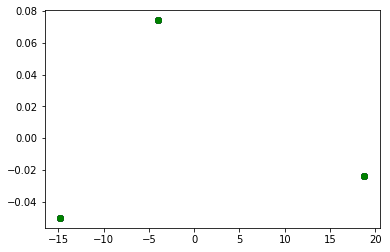

In [43]:
plt.plot(x_coord[0],y_coord[0], 'ro',x_coord[1],y_coord[1], 'bo', x_coord[2],y_coord[2], 'yo', x_coord[3],y_coord[3], 'go', x_coord[4],y_coord[4], 'co', x_coord[5],y_coord[5], 'mo', x_coord[6],y_coord[6], 'ro', x_coord[7],y_coord[7], 'bo', x_coord[8],y_coord[8], 'go', x_coord[9],y_coord[9], 'go')
plt.show()

In [25]:
x_coord

[[18.774651686823727, -3.9548375392030937, -14.819814147620635],
 [-14.81981414762065, -3.9548375392031, 18.774651686823752],
 [-3.9548375392030852, -14.819814147620626, 18.774651686823724],
 [-3.9548375392030914, -14.81981414762063, 18.77465168682372],
 [-14.819814147620582, 18.774651686823603, -3.95483753920303],
 [18.774651686823724, -3.9548375392030897, -14.81981414762064],
 [18.77465168682372, -14.819814147620628, -3.9548375392030946],
 [-3.9548375392030866, 18.77465168682372, -14.819814147620637],
 [18.774651686823734, -3.954837539203088, -14.819814147620642],
 [-14.819814147620656, 18.774651686823738, -3.9548375392030963]]

In [ ]:
#We can see that although the Silhouette coefficient is not high, the cluster centroids are stable 
#(at lest on the numerical variables),as we get almost the same ones after running the algorithm multiple times

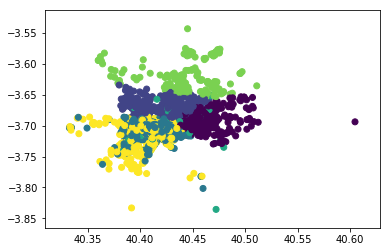

In [102]:
plt.scatter(listings['latitude'], listings['longitude'], c = model_fit6.labels_.astype(np.float))
plt.show()